### Band structure plots

Generate k-points file

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
from BZI.symmetry import sym_path
import numpy as np
import matplotlib.pyplot as plt

Write a k-points file with k-points between symmetry points.

In [35]:
sympt_pairs = [("G","X"),("X","W"),("W","L"),("L","G"),("G","K")]
npts = 10
paths = sym_path("fcc",npts,sympt_pairs)

In [ ]:
file = open("KPOINTS","w")
file.write("Symmetry Paths\n")
file.write("%s\n" %len(paths))
file.write("Reciprocal\n")
for pt in paths:
    for comp in pt:
        file.write("%s "%comp)
    file.write("\n")
file.close()

Read the energies and occupancies from the OUTCAR file.

In [99]:
with open("KPOINTS","r") as file:
    npts_path = int(file.readlines()[1].split()[0])

In [265]:
Ef = 7.6155 #Fermi energy
with open("OUTCAR", "r") as file:
    f = file.readlines()
    id_line = f[1965]
    nbands = 20
    energies = []
    occupancies = []
    kpoints = []
    nkpt = 0
    nkpts_dr = 0 # number of kpoints with duplicates removed
    for i,line in enumerate(f):
        if line == id_line:
            nkpt += 1
            if nkpt % npts_path == 0 and nkpt != nkpoints:
                continue
            else:
                nkpts_dr += 1
                energies.append([])
                occupancies.append([])
                kpoints.append(list(map(float,f[i-1].split()[3:6])))
                for j in range(1,nbands+1):
                    energies[nkpts_dr-1].append(float(f[i+j].split()[1]) - Ef)
                    occupancies[nkpts_dr-1].append(float(f[i+j].split()[2]))
print(len(kpoints))
print(len(energies))

246
246


Find the x-axis

In [266]:
G = np.array(kpoints[0])
X = np.array(kpoints[49])
W = np.array(kpoints[98])
L = np.array(kpoints[147])
G2 = np.array(kpoints[196])
K = np.array(kpoints[245])

l1 = np.linalg.norm(X - G)
l2 = np.linalg.norm(W - X)
l3 = np.linalg.norm(L - W)
l4 = np.linalg.norm(G2 - L)
l5 = np.linalg.norm(K - G2)
ltot = l1 + l2 + l3 + l4 + l5

line1 = list(np.delete(np.linspace(0,l1,npts_path),-1))
line2 = list(np.delete(np.linspace(l1,l1+l2,npts_path),-1))
line3 = list(np.delete(np.linspace(l1+l2,l1+l2+l3,npts_path),-1))
line4 = list(np.delete(np.linspace(l1+l2+l3,l1+l2+l3+l4,npts_path),-1))
line5 = list(np.linspace(l1+l2+l3+l4,l1+l2+l3+l4+l5,npts_path))
lines = line1 + line2 + line3 + line4 + line5

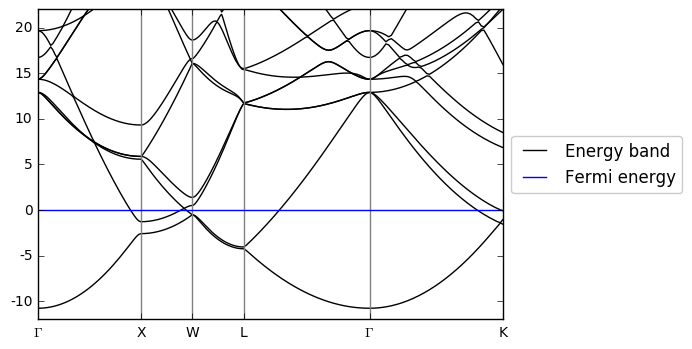

In [311]:
for nb in range(nbands):
    ienergy = []
    for nk in range(len(kpoints)):
        ienergy.append(energies[nk][nb])
    if nb == 0:
        plt.plot(lines,ienergy, label="Energy band",color="black")
    else:
        plt.plot(lines,ienergy,color="black")
plt.axvline(x = l1, c="gray")
plt.axvline(x = l1 + l2, c="gray")
plt.axvline(x = l1 + l2 + l3, c="gray")
plt.axvline(x = l1 + l2 + l3 + l4, c="gray")
plt.axhline(y = 0, c="blue", label="Fermi energy")

tick_labels = ["$\Gamma$","X","W","L","$\Gamma$","K"]
tick_locs = [0, l1, l1 + l2, l1 + l2 + l3, l1 + l2 + l3 + l4, l1 + l2 + l3 + l4 + l5]

plt.xticks(tick_locs,tick_labels)
plt.yticks(range(-15,21,5),range(-15,21,5))
plt.ylim([-12, 22])
plt.xlim([0,ltot])
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, .5),fancybox=True)
lgd.get_frame().set_alpha(0.2)
plt.show()
plt.close()